In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
data=pd.read_csv("Automobile.csv")
data

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [8]:
data.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [9]:
data['horsepower'].mean()

104.46938775510205

In [10]:
# in order to change the origin from usa to japan
data_grouped = data.groupby('origin')
data_japan=data[data['origin'] == 'japan']
data_japan

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
14,toyota corona mark ii,24.0,4,113.0,95.0,2372,15.0,70,japan
18,datsun pl510,27.0,4,97.0,88.0,2130,14.5,70,japan
29,datsun pl510,27.0,4,97.0,88.0,2130,14.5,71,japan
31,toyota corona,25.0,4,113.0,95.0,2228,14.0,71,japan
53,toyota corolla 1200,31.0,4,71.0,65.0,1773,19.0,71,japan
...,...,...,...,...,...,...,...,...,...
382,toyota corolla,34.0,4,108.0,70.0,2245,16.9,82,japan
383,honda civic,38.0,4,91.0,67.0,1965,15.0,82,japan
384,honda civic (auto),32.0,4,91.0,67.0,1965,15.7,82,japan
385,datsun 310 gx,38.0,4,91.0,67.0,1995,16.2,82,japan


In [11]:
for name,group in data_grouped:
    if name=='japan':
        data_japan=group
    elif name=='usa':
        data_usa=group
    else:
        data_europe=group


In [12]:
data_europe

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
19,volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,europe
20,peugeot 504,25.0,4,110.0,87.0,2672,17.5,70,europe
21,audi 100 ls,24.0,4,107.0,90.0,2430,14.5,70,europe
22,saab 99e,25.0,4,104.0,95.0,2375,17.5,70,europe
23,bmw 2002,26.0,4,121.0,113.0,2234,12.5,70,europe
...,...,...,...,...,...,...,...,...,...
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,europe
359,peugeot 505s turbo diesel,28.1,4,141.0,80.0,3230,20.4,81,europe
360,volvo diesel,30.7,6,145.0,76.0,3160,19.6,81,europe
375,volkswagen rabbit l,36.0,4,105.0,74.0,1980,15.3,82,europe


In [39]:
data['origin'] = data['origin'].map({'japan': 0, 'usa': 1, 'europe': 2})
data['target'] = data['origin'].map({0:'japan', 1:'usa', 2:'europe'})
data

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,target
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,NaN,NaN
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,NaN,NaN
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,NaN,NaN
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,NaN,NaN
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,NaN,NaN
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,NaN,NaN
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,NaN,NaN
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,NaN,NaN


In [13]:
data_japan.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
std,6.090048,0.590414,23.140126,17.819199,320.497248,1.954937,3.650595
min,18.000000,3.000000,70.000000,52.000000,1613.000000,11.400000,70.000000
25%,25.700000,4.000000,86.000000,67.000000,1985.000000,14.600000,74.000000
50%,31.600000,4.000000,97.000000,75.000000,2155.000000,16.400000,78.000000
75%,34.050000,4.000000,119.000000,95.000000,2412.500000,17.550000,81.000000
max,46.600000,6.000000,168.000000,132.000000,2930.000000,21.000000,82.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          392 non-null    object 
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   model_year    392 non-null    int64  
 8   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


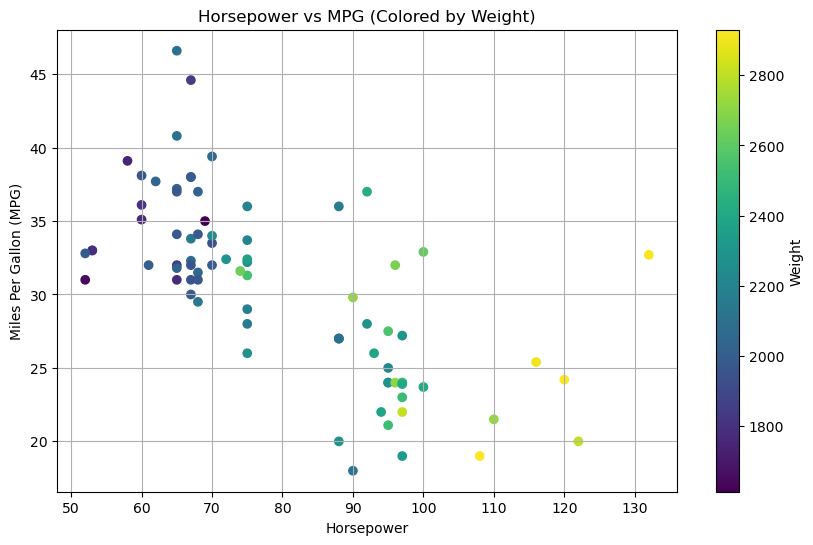

In [14]:
# Remove missing values
df_clean = data_japan.dropna(subset=["horsepower", "mpg"])

plt.figure(figsize=(10, 6))
plt.scatter(df_clean["horsepower"], df_clean["mpg"], alpha=1, c=df_clean["weight"],)
plt.colorbar(label="Weight")
plt.xlabel("Horsepower")
plt.ylabel("Miles Per Gallon (MPG)")
plt.title("Horsepower vs MPG (Colored by Weight)")
plt.grid()
plt.show()

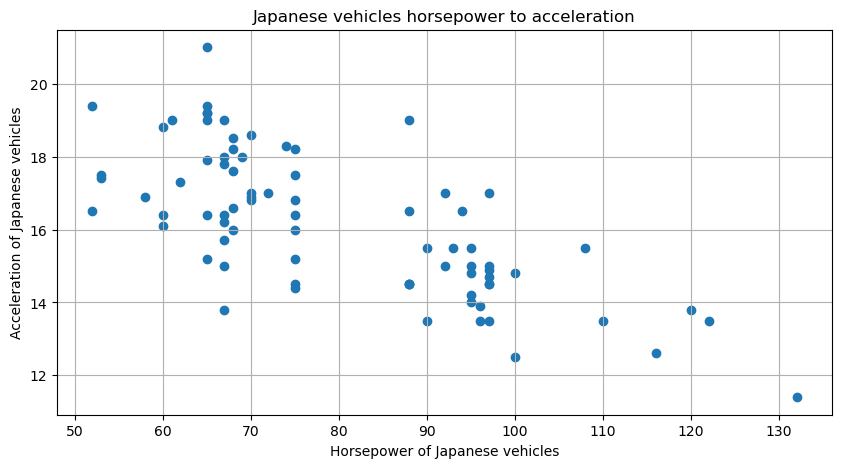

In [16]:
x = data_japan.horsepower
y = data_japan.acceleration
z = data_japan.displacement

plt.figure(figsize=(10,5)) 

plt.scatter(x,y)


plt.title("Japanese vehicles horsepower to acceleration")  # Adding a title
plt.xlabel("Horsepower of Japanese vehicles")  # Adding X-axis label
plt.ylabel("Acceleration of Japanese vehicles")  # Adding Y-axis label
plt.grid(True)  # Adding grid lines
plt.show()  # Displaying the plot

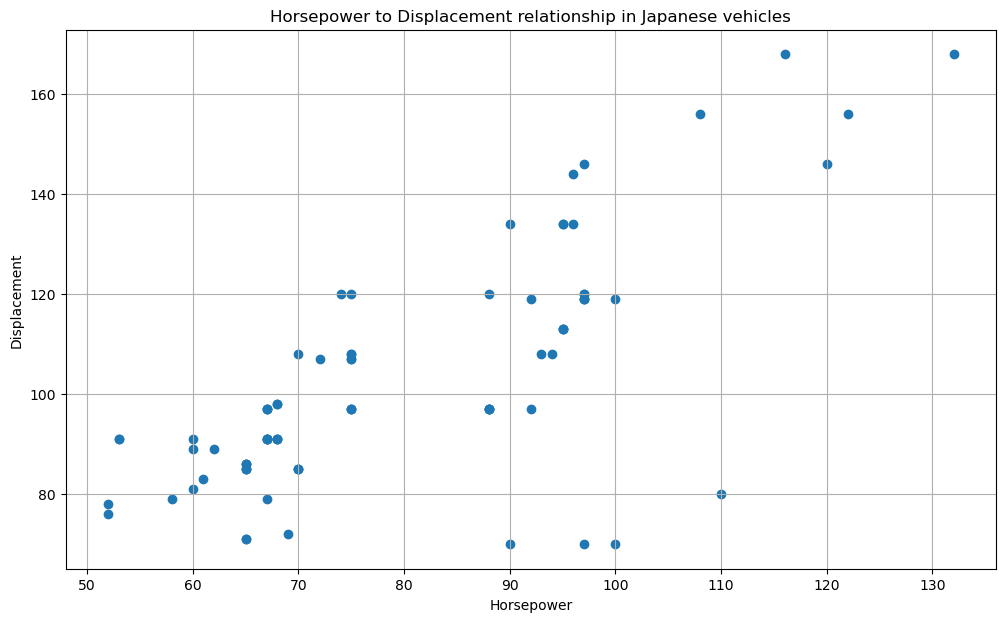

In [17]:
plt.figure(figsize=(12,7))
plt.scatter(x,z)
plt.grid(True)

plt.xlabel("Horsepower")
plt.ylabel("Displacement")
plt.title("Horsepower to Displacement relationship in Japanese vehicles")
plt.show()

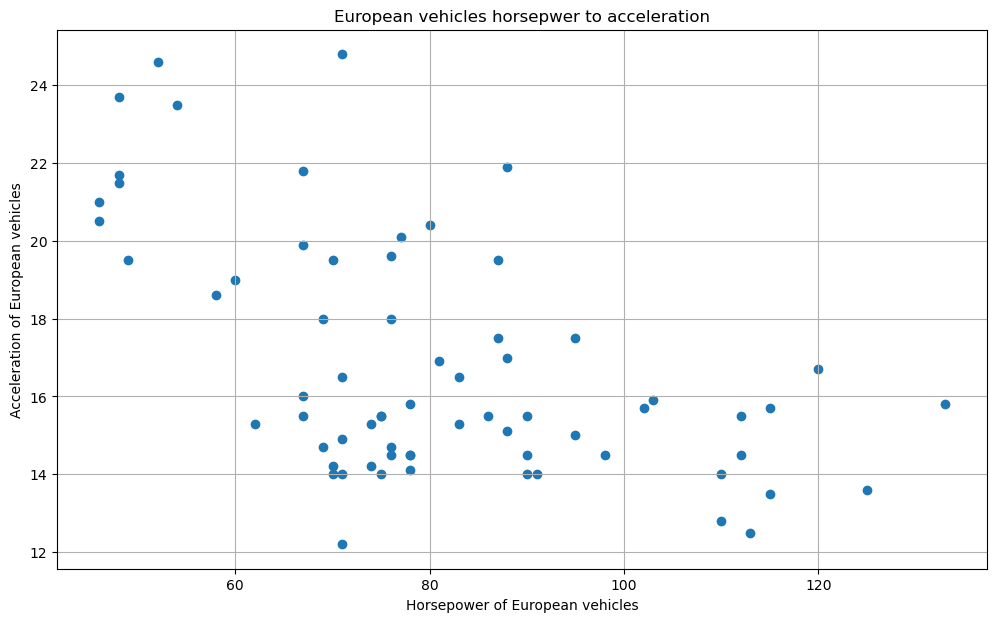

In [18]:
p = data_europe.horsepower
q = data_europe.acceleration
r = data_europe.displacement

plt.figure(figsize=(12,7)) 

plt.scatter(p,q)


plt.title("European vehicles horsepwer to acceleration")  # Adding a title
plt.xlabel("Horsepower of European vehicles")  # Adding X-axis label
plt.ylabel("Acceleration of European vehicles")  # Adding Y-axis label
plt.grid(True)  # Adding grid lines
plt.show()  # Displaying the plot

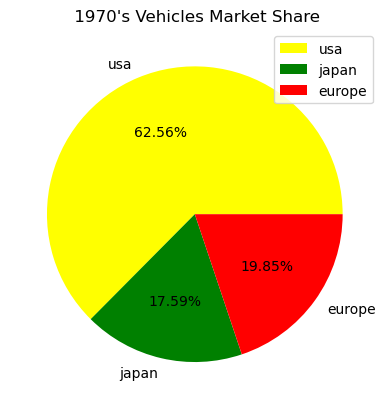

In [20]:
a = []
a= data.origin.unique()

b=((data_usa.origin.count()/data.origin.count())*100)
c=((data_europe.origin.count()/data.origin.count())*100)
d=((data_japan.origin.count()/data.origin.count())*100)

list_percentages=[b,c,d]

plt.pie(list_percentages, labels=a, autopct='%1.2f%%', colors=['yellow', 'green', 'red'])
plt.legend()

plt.title(" 1970's Vehicles Market Share")

plt.show()


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [22]:
data.dropna(inplace=True)

In [24]:
x_horse=data[['horsepower']]
y_displa=data['displacement']

In [25]:
x_horse

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


In [27]:
x_horse_train, x_horse_test, y_displa_train, y_displa_test = train_test_split(x_horse, y_displa, test_size=0.2, random_state=42)

In [29]:
model = LinearRegression()
model.fit(x_horse_train, y_displa_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_horse_test)

In [33]:
mean = mean_squared_error(y_displa_test, y_pred)
print("Mean Squared Error:", mean)
print("Predictions for Test Set:", y_pred)

Mean Squared Error: 1957.1596172054728
Predictions for Test Set: [109.36349948 220.7041632   87.57945658 111.78394869 150.51113607
 123.88619475 353.82886982 123.88619475 172.29517897  60.95451526
 402.23785404 203.76101872 317.52213165 123.88619475 264.272249
 155.35203449 172.29517897 123.88619475 135.9884408  155.35203449
 172.29517897  68.21586289 106.94305027 257.01090137 104.52260106
 160.19293292 152.93158528 196.49967109  53.69316762 126.30664396
 293.31763954 160.19293292 244.90865531 121.46574554 305.41988559
 104.52260106 281.21539348 135.9884408  281.21539348 462.74908432
 257.01090137 123.88619475 121.46574554 131.14754238 300.57898717
 462.74908432 184.39742503 109.36349948 116.62484711 111.78394869
 312.68123323 172.29517897 160.19293292 155.35203449 213.44281556
 208.60191714 208.60191714 184.39742503 172.29517897 172.29517897
 486.95357644 160.19293292 220.7041632  155.35203449 172.29517897
 138.40889002 155.35203449 111.78394869 208.60191714 421.60144773
 116.62484711

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


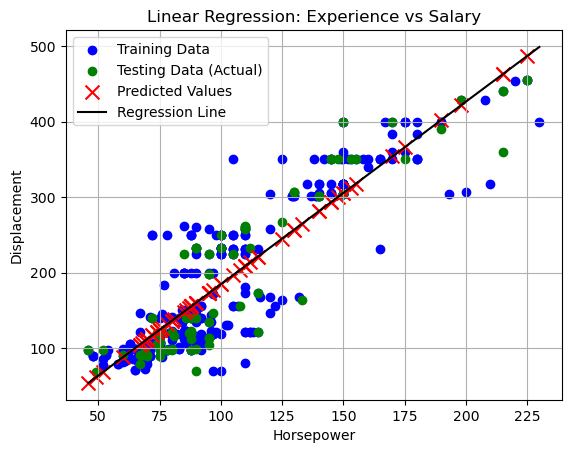

In [35]:
plt.scatter(x_horse_train, y_displa_train, color='blue', label='Training Data')
plt.scatter(x_horse_test, y_displa_test, color='green', label='Testing Data (Actual)')
plt.scatter(x_horse_test, y_pred, color='red', marker='x', s=100, label='Predicted Values')

X_full = np.linspace(x_horse.min(), x_horse.max(), 100).reshape(-1, 1)
y_line = model.predict(X_full)
plt.plot(X_full, y_line, color='black', label='Regression Line')

plt.xlabel('Horsepower')
plt.ylabel('Displacement')
plt.title('Linear Regression: Experience vs Salary')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [44]:
features_to_scale = ['mpg', 'displacement', 'horsepower', 'weight','acceleration']

In [45]:
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(data[features_to_scale]), columns=features_to_scale)
print("\nDataset After Min-Max Scaling:")
df_minmax_scaled


Dataset After Min-Max Scaling:


,mpg,displacement,horsepower,weight,acceleration
0,0.239362,0.617571,0.456522,0.536150,0.238095
1,0.159574,0.728682,0.646739,0.589736,0.208333
2,0.239362,0.645995,0.565217,0.516870,0.178571
3,0.186170,0.609819,0.565217,0.516019,0.238095
4,0.212766,0.604651,0.510870,0.520556,0.148810
...,...,...,...,...,...
387,0.478723,0.186047,0.217391,0.333711,0.452381
388,0.930851,0.074935,0.032609,0.146583,0.988095
389,0.611702,0.173127,0.206522,0.193365,0.214286
390,0.505319,0.134367,0.179348,0.286929,0.630952
